In [1]:
import matplotlib.pyplot as plt
import os
from glob import glob
import numpy as np
from scipy.signal import find_peaks

In [2]:
def read_data(path:str) -> tuple:
    wavenumbers = []
    values = []
    with open(path) as f:
        for line in f.readlines():
            wave, value = line.rstrip('\n').split('\t')
            wavenumbers.append(float(wave))
            values.append(float(value))
    return wavenumbers, values

def plot(wavenumbers, values, title="") -> None:
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
    for idx, value in enumerate(values):
        # print(value.shape)
        ax.plot(wavenumbers, value, label=idx)
    ax.grid()
    ax.set_title(f"A Raman Spectroscopy of {title}")
    ax.set_xlabel(f"wavenumber (cm^-1)")
    ax.set_ylabel(f"Intensity")
    ax.legend()
        # peak_idxs, _ = find_peaks(value, distance=100, height=value.mean())
        # for idxs in peak_idxs:
        #     x:float = wavenumbers[idxs] # type: ignore
        #     y:float = value[idxs] # type: ignore
        #     ax.axvline(x, color='black', linestyle='--', alpha=0.5)
        #     ax.text(x, y + 1, f'{x}')

    plt.show()

In [3]:
glucose_values = [94,98,144,105,105,94]

In [4]:
files = glob(f"./data/day2/smoothing/*.txt")
wavenumbers = None
samples = []
for file in files:
    wavenumbers, values = read_data(file)
    samples.append(np.array(values).reshape(1,-1))
samples = np.vstack(samples)
wavenumbers = np.array(wavenumbers)
print(samples.shape)

(8, 3538)


In [8]:
for sample in samples:
    print(sample.shape, wavenumbers.shape)

(3538,) (3538,)
(3538,) (3538,)
(3538,) (3538,)
(3538,) (3538,)
(3538,) (3538,)
(3538,) (3538,)
(3538,) (3538,)
(3538,) (3538,)


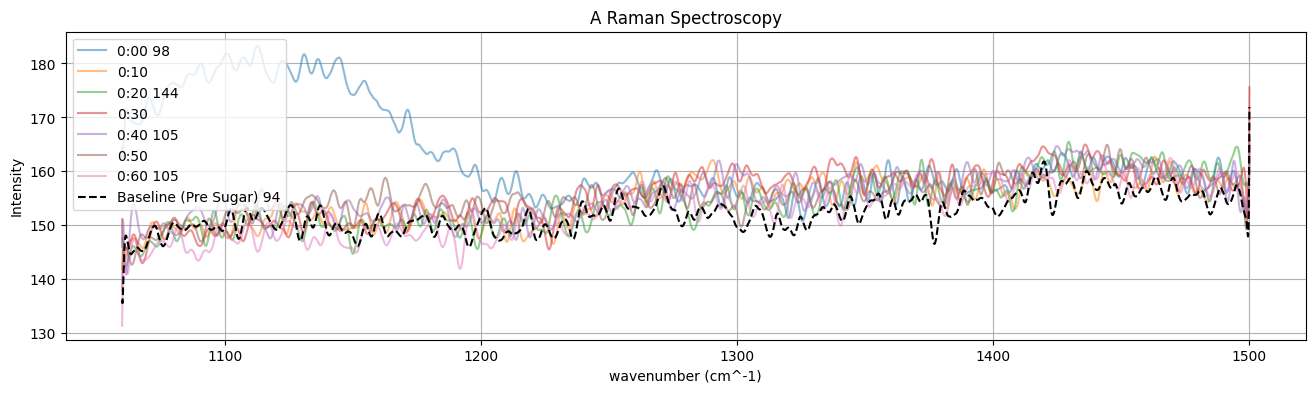

In [26]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
ax.plot(wavenumbers, samples[1], label="0:00 98", alpha=0.5)
ax.plot(wavenumbers, samples[2], label="0:10", alpha=0.5)
ax.plot(wavenumbers, samples[3], label="0:20 144", alpha=0.5)
ax.plot(wavenumbers, samples[4], label="0:30", alpha=0.5)
ax.plot(wavenumbers, samples[5], label="0:40 105", alpha=0.5)
ax.plot(wavenumbers, samples[6], label="0:50", alpha=0.5)
ax.plot(wavenumbers, samples[7], label="0:60 105", alpha=0.5)
ax.plot(wavenumbers, samples[0], label='Baseline (Pre Sugar) 94', color='black', linestyle='--')
ax.grid()
ax.set_title(f"A Raman Spectroscopy")
ax.set_xlabel(f"wavenumber (cm^-1)")
ax.set_ylabel(f"Intensity")
ax.legend()
plt.show()

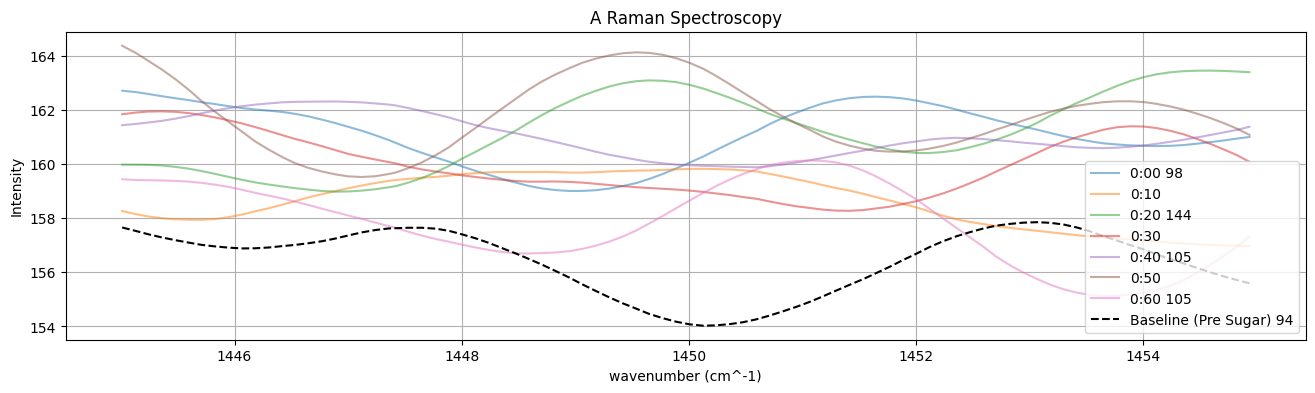

In [34]:
idx_1450_band = np.logical_and((wavenumbers > 1445) ,(wavenumbers < 1455))
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
ax.plot(wavenumbers[idx_1450_band], samples[1][idx_1450_band], label="0:00 98", alpha=0.5)
ax.plot(wavenumbers[idx_1450_band], samples[2][idx_1450_band], label="0:10", alpha=0.5)
ax.plot(wavenumbers[idx_1450_band], samples[3][idx_1450_band], label="0:20 144", alpha=0.5)
ax.plot(wavenumbers[idx_1450_band], samples[4][idx_1450_band], label="0:30", alpha=0.5)
ax.plot(wavenumbers[idx_1450_band], samples[5][idx_1450_band], label="0:40 105", alpha=0.5)
ax.plot(wavenumbers[idx_1450_band], samples[6][idx_1450_band], label="0:50", alpha=0.5)
ax.plot(wavenumbers[idx_1450_band], samples[7][idx_1450_band], label="0:60 105", alpha=0.5)
ax.plot(wavenumbers[idx_1450_band], samples[0][idx_1450_band], label='Baseline (Pre Sugar) 94', color='black', linestyle='--')
ax.grid()
ax.set_title(f"A Raman Spectroscopy")
ax.set_xlabel(f"wavenumber (cm^-1)")
ax.set_ylabel(f"Intensity")
ax.legend()
plt.show()

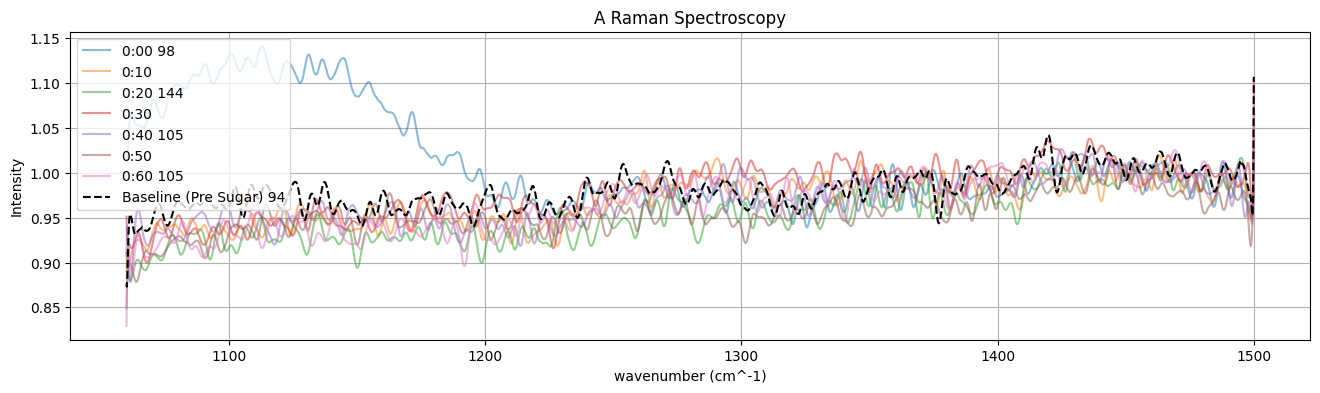

In [39]:
idx_1450_band = np.logical_and((wavenumbers > 1448) ,(wavenumbers < 1452))
# [idx_1450_band].mean()
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(16,4))
ax.plot(wavenumbers, samples[1] / samples[1][idx_1450_band].mean(), label="0:00 98", alpha=0.5)
ax.plot(wavenumbers, samples[2] / samples[2][idx_1450_band].mean(), label="0:10", alpha=0.5)
ax.plot(wavenumbers, samples[3] / samples[3][idx_1450_band].mean(), label="0:20 144", alpha=0.5)
ax.plot(wavenumbers, samples[4] / samples[4][idx_1450_band].mean(), label="0:30", alpha=0.5)
ax.plot(wavenumbers, samples[5] / samples[5][idx_1450_band].mean(), label="0:40 105", alpha=0.5)
ax.plot(wavenumbers, samples[6] / samples[6][idx_1450_band].mean(), label="0:50", alpha=0.5)
ax.plot(wavenumbers, samples[7] / samples[7][idx_1450_band].mean(), label="0:60 105", alpha=0.5)
ax.plot(wavenumbers, samples[0] / samples[0][idx_1450_band].mean(), label='Baseline (Pre Sugar) 94', color='black', linestyle='--')
ax.grid()
ax.set_title(f"A Raman Spectroscopy")
ax.set_xlabel(f"wavenumber (cm^-1)")
ax.set_ylabel(f"Intensity")
ax.legend()
plt.show()

In [37]:
samples[1][idx_1450_band].mean()

161.0626046511628